In [1]:
import numpy as np
import pickle
np.random.seed(7)  # for reproducibility


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2


Using TensorFlow backend.


In [3]:
import keras
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('tf')

In [4]:
import matplotlib.pyplot as plt
import os
import numpy

In [5]:
def unpickle(file):
    with open(file,'rb') as fo:
        dict=pickle.load(fo, encoding='bytes')
    data=dict['data']
    data = data.reshape((-1, 32, 32, 3))
    labels=dict['label']
    return data, labels

In [6]:
def saveTest(your_predict_labels):
    f=open('testlabel.pickle','rb')
    labels=pickle.load(f)
    f.close()
  #here you must replace the labels that you have predicted for the test set:
    for i in range(len(labels)):
        labels[i]=your_predict_labels[i]
  #save the pickle file that you should upload:
    f=open('testlabel.pickle','wb')
    pickle.dump(labels,f)
    f.close()

In [7]:
X_train_label, Y_train_label =unpickle("trainset.pickle")
print(X_train_label.shape)

(9000, 32, 32, 3)


In [8]:
X_validation_label, Y_validation_label=unpickle("validset.pickle")

In [9]:
f=open('testset.pickle','rb')
dict=pickle.load(f)
f.close()
X_test_label=dict['data']
X_test_label = X_test_label.reshape((-1, 32, 32, 3))
X_test = X_test_label.astype('float32')

print(X_test_label.shape)

(3000, 32, 32, 3)


In [10]:
f=open('testlabel.pickle','rb')
Y_test_label=pickle.load(f)
f.close()
Y_test=np_utils.to_categorical(Y_test_label, 10)


In [11]:
X_train = X_train_label.astype('float32')
X_validation = X_validation_label.astype('float32')


Y_train = np_utils.to_categorical(Y_train_label, 10)
Y_validation = np_utils.to_categorical(Y_validation_label, 10)
print(X_train.shape)

(9000, 32, 32, 3)


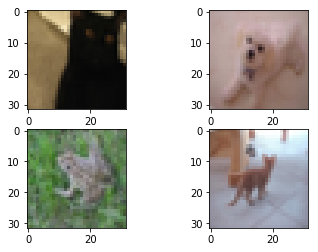

In [12]:
#image visualization
for i in range(4):
    img=X_train_label[i]
    img=img.reshape(-1,32,32).transpose([1,2,0])
    plt.subplot(2,2,i+1)
    plt.imshow(img)


In [18]:
# Parameter
num_classes = Y_train.shape[1]
batch_size = 64
epochs = 100
no_estimators = 10

In [19]:
# create CNN 6 conv layers & 2 Maxpooling layers & 3 fully connected layers 
def create_cnn_model():
    model = Sequential()
    model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3), activation='relu', border_mode='same'))
    model.add(BatchNormalization())    
    model.add(Dropout(0.2))
    model.add(Convolution2D(32, 3, 3, activation='relu', border_mode='same'))
    
    model.add(BatchNormalization())
    model.add(Convolution2D(64, 3, 3, activation='relu', border_mode='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Convolution2D(64, 3, 3, activation='relu', border_mode='same'))

    model.add(BatchNormalization())
    model.add(Convolution2D(128, 3, 3, activation='relu', border_mode='same'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Convolution2D(128, 3, 3, activation='relu', border_mode='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Flatten())
    
    model.add(Dropout(0.2))
    model.add(Dense(1024, activation='relu', W_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu', W_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  after removing the cwd from sys.path.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  import sys
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_l

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 14s - loss: 4.2735 - acc: 0.4758 - val_loss: 3.3040 - val_acc: 0.5743
Epoch 2/100
 - 5s - loss: 2.8560 - acc: 0.5876 - val_loss: 2.3892 - val_acc: 0.6047
Epoch 3/100
 - 5s - loss: 2.1077 - acc: 0.6251 - val_loss: 1.8403 - val_acc: 0.6237
Epoch 4/100
 - 5s - loss: 1.6682 - acc: 0.6373 - val_loss: 1.4936 - val_acc: 0.6167
Epoch 5/100
 - 6s - loss: 1.3711 - acc: 0.6722 - val_loss: 1.3053 - val_acc: 0.6443
Epoch 6/100
 - 5s - loss: 1.1998 - acc: 0.6909 - val_loss: 1.3493 - val_acc: 0.6003
Epoch 7/100
 - 5s - loss: 1.1027 - acc: 0.7024 - val_loss: 1.4235 - val_acc: 0.5867
Epoch 8/100
 - 5s - loss: 1.0339 - acc: 0.7299 - val_loss: 1.2667 - val_acc: 0.6300
Epoch 9/100
 - 5s - loss: 1.0501 - acc: 0.7336 - val_loss: 1.2474 - val_acc: 0.6667
Epoch 10/100
 - 5s - loss: 1.0122 - acc: 0.7566 - val_loss: 1.2284 - val_acc: 0.6693
Epoch 11/100
 - 5s - loss: 1.0068 - acc: 0.7670 - val_loss: 1.1787 - val_acc: 0.6920
Epoch 12/100
 - 5s - loss

Epoch 97/100
 - 5s - loss: 0.2367 - acc: 0.9768 - val_loss: 1.4756 - val_acc: 0.7017
Epoch 98/100
 - 5s - loss: 0.2246 - acc: 0.9753 - val_loss: 1.4344 - val_acc: 0.7117
Epoch 99/100
 - 6s - loss: 0.2356 - acc: 0.9744 - val_loss: 1.3575 - val_acc: 0.7167
Epoch 100/100
 - 6s - loss: 0.2120 - acc: 0.9782 - val_loss: 1.4645 - val_acc: 0.7157
3000/3000 [==============================] - 1s 283us/step

Test Accuracy: 0.7950


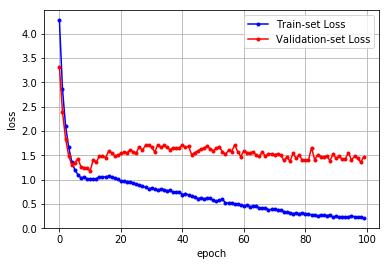

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 14s - loss: 4.2604 - acc: 0.4827 - val_loss: 3.2460 - val_acc: 0.6027
Epoch 2/100
 - 5s - loss: 2.8768 - acc: 0.5882 - val_loss: 2.4455 - val_acc: 0.5963
Epoch 3/100
 - 5s - loss: 2.1198 - acc: 0.6291 - val_loss: 1.8204 - val_acc: 0.6450
Epoch 4/100
 - 5s - loss: 1.6669 - acc: 0.6637 - val_loss: 1.5526 - val_acc: 0.6220
Epoch 5/100
 - 5s - loss: 1.3789 - acc: 0.6828 - val_loss: 1.4018 - val_acc: 0.6410
Epoch 6/100
 - 5s - loss: 1.2347 - acc: 0.6947 - val_loss: 1.3243 - val_acc: 0.6120
Epoch 7/100
 - 5s - loss: 1.1450 - acc: 0.7172 - val_loss: 1.1913 - val_acc: 0.6790
Epoch 8/100
 - 5s - loss: 1.0976 - acc: 0.7426 - val_loss: 1.1925 - val_acc: 0.6870
Epoch 9/100
 - 5s - loss: 1.0646 - acc: 0.7560 - val_loss: 1.2862 - val_acc: 0.6763
Epoch 10/100
 - 5s - loss: 1.0745 - acc: 0.7689 - val_loss: 1.2560 - val_acc: 0.6827
Epoch 11/100
 - 5s - loss: 1.0794 - acc: 0.7831 - val_loss: 1.3117 - val_acc: 0.6803
Epoch 12/100
 - 5s - loss

Epoch 97/100
 - 4s - loss: 0.2353 - acc: 0.9767 - val_loss: 1.4537 - val_acc: 0.7133
Epoch 98/100
 - 4s - loss: 0.2404 - acc: 0.9752 - val_loss: 1.3171 - val_acc: 0.7073
Epoch 99/100
 - 4s - loss: 0.2142 - acc: 0.9829 - val_loss: 1.5471 - val_acc: 0.6953
Epoch 100/100
 - 5s - loss: 0.2344 - acc: 0.9776 - val_loss: 1.4958 - val_acc: 0.6953
3000/3000 [==============================] - 0s 158us/step

Test Accuracy: 0.7713


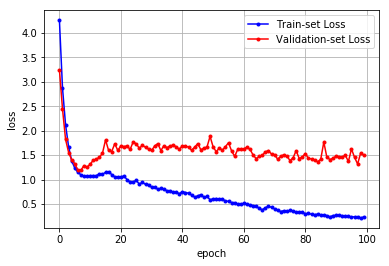

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 13s - loss: 4.2309 - acc: 0.4911 - val_loss: 4.2470 - val_acc: 0.4500
Epoch 2/100
 - 4s - loss: 2.8656 - acc: 0.5980 - val_loss: 2.4329 - val_acc: 0.6193
Epoch 3/100
 - 5s - loss: 2.1347 - acc: 0.6348 - val_loss: 1.8365 - val_acc: 0.6343
Epoch 4/100
 - 5s - loss: 1.6658 - acc: 0.6533 - val_loss: 1.4886 - val_acc: 0.6473
Epoch 5/100
 - 5s - loss: 1.3768 - acc: 0.6743 - val_loss: 1.4293 - val_acc: 0.6200
Epoch 6/100
 - 5s - loss: 1.1997 - acc: 0.7014 - val_loss: 1.3292 - val_acc: 0.6187
Epoch 7/100
 - 5s - loss: 1.0958 - acc: 0.7187 - val_loss: 1.2793 - val_acc: 0.6323
Epoch 8/100
 - 5s - loss: 1.0479 - acc: 0.7392 - val_loss: 1.2337 - val_acc: 0.6607
Epoch 9/100
 - 5s - loss: 1.0308 - acc: 0.7591 - val_loss: 1.3054 - val_acc: 0.6467
Epoch 10/100
 - 5s - loss: 1.0128 - acc: 0.7707 - val_loss: 1.2120 - val_acc: 0.6747
Epoch 11/100
 - 5s - loss: 1.0252 - acc: 0.7830 - val_loss: 1.4349 - val_acc: 0.6610
Epoch 12/100
 - 5s - loss

Epoch 97/100
 - 5s - loss: 0.2201 - acc: 0.9751 - val_loss: 1.4339 - val_acc: 0.7160
Epoch 98/100
 - 5s - loss: 0.2133 - acc: 0.9760 - val_loss: 1.4799 - val_acc: 0.7117
Epoch 99/100
 - 5s - loss: 0.2185 - acc: 0.9758 - val_loss: 1.4403 - val_acc: 0.7140
Epoch 100/100
 - 5s - loss: 0.2075 - acc: 0.9761 - val_loss: 1.4643 - val_acc: 0.7057
3000/3000 [==============================] - 1s 197us/step

Test Accuracy: 0.7933


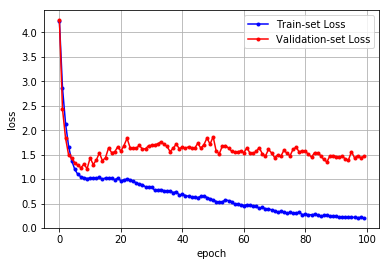

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 13s - loss: 4.2354 - acc: 0.4836 - val_loss: 3.2564 - val_acc: 0.5870
Epoch 2/100
 - 5s - loss: 2.8393 - acc: 0.5923 - val_loss: 2.5577 - val_acc: 0.5693
Epoch 3/100
 - 5s - loss: 2.0929 - acc: 0.6188 - val_loss: 1.9386 - val_acc: 0.5690
Epoch 4/100
 - 5s - loss: 1.6129 - acc: 0.6546 - val_loss: 1.4467 - val_acc: 0.6450
Epoch 5/100
 - 5s - loss: 1.3268 - acc: 0.6727 - val_loss: 1.2651 - val_acc: 0.6447
Epoch 6/100
 - 5s - loss: 1.1606 - acc: 0.6940 - val_loss: 1.1709 - val_acc: 0.6643
Epoch 7/100
 - 5s - loss: 1.0991 - acc: 0.7042 - val_loss: 1.1405 - val_acc: 0.6577
Epoch 8/100
 - 5s - loss: 1.0322 - acc: 0.7240 - val_loss: 1.1715 - val_acc: 0.6353
Epoch 9/100
 - 5s - loss: 1.0243 - acc: 0.7399 - val_loss: 1.1801 - val_acc: 0.6830
Epoch 10/100
 - 5s - loss: 1.0020 - acc: 0.7652 - val_loss: 1.2108 - val_acc: 0.6780
Epoch 11/100
 - 5s - loss: 1.0126 - acc: 0.7726 - val_loss: 1.2801 - val_acc: 0.6817
Epoch 12/100
 - 5s - loss

Epoch 97/100
 - 5s - loss: 0.2221 - acc: 0.9774 - val_loss: 1.4359 - val_acc: 0.7027
Epoch 98/100
 - 5s - loss: 0.2306 - acc: 0.9752 - val_loss: 1.5114 - val_acc: 0.7027
Epoch 99/100
 - 4s - loss: 0.2359 - acc: 0.9778 - val_loss: 1.5440 - val_acc: 0.6937
Epoch 100/100
 - 5s - loss: 0.2473 - acc: 0.9736 - val_loss: 1.4328 - val_acc: 0.7037
3000/3000 [==============================] - 1s 171us/step

Test Accuracy: 0.7820


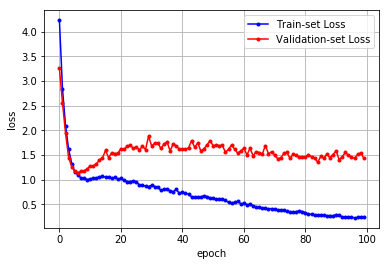

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 14s - loss: 4.1968 - acc: 0.4867 - val_loss: 3.3012 - val_acc: 0.5587
Epoch 2/100
 - 5s - loss: 2.7404 - acc: 0.6002 - val_loss: 2.2961 - val_acc: 0.6207
Epoch 3/100
 - 5s - loss: 2.0385 - acc: 0.6314 - val_loss: 1.8027 - val_acc: 0.6110
Epoch 4/100
 - 5s - loss: 1.5944 - acc: 0.6597 - val_loss: 1.4518 - val_acc: 0.6463
Epoch 5/100
 - 5s - loss: 1.3317 - acc: 0.6791 - val_loss: 1.2693 - val_acc: 0.6620
Epoch 6/100
 - 5s - loss: 1.1783 - acc: 0.7029 - val_loss: 1.2614 - val_acc: 0.6483
Epoch 7/100
 - 5s - loss: 1.1042 - acc: 0.7162 - val_loss: 1.2218 - val_acc: 0.6737
Epoch 8/100
 - 5s - loss: 1.0471 - acc: 0.7460 - val_loss: 1.3786 - val_acc: 0.5927
Epoch 9/100
 - 5s - loss: 1.0481 - acc: 0.7491 - val_loss: 1.3209 - val_acc: 0.6503
Epoch 10/100
 - 5s - loss: 1.0424 - acc: 0.7739 - val_loss: 1.3148 - val_acc: 0.6720
Epoch 11/100
 - 5s - loss: 1.0335 - acc: 0.7903 - val_loss: 1.3033 - val_acc: 0.6797
Epoch 12/100
 - 5s - loss

Epoch 97/100
 - 5s - loss: 0.2488 - acc: 0.9764 - val_loss: 1.4595 - val_acc: 0.7020
Epoch 98/100
 - 5s - loss: 0.2411 - acc: 0.9779 - val_loss: 1.4888 - val_acc: 0.7010
Epoch 99/100
 - 5s - loss: 0.2450 - acc: 0.9757 - val_loss: 1.3816 - val_acc: 0.7143
Epoch 100/100
 - 5s - loss: 0.2271 - acc: 0.9786 - val_loss: 1.4165 - val_acc: 0.7127
3000/3000 [==============================] - 1s 178us/step

Test Accuracy: 0.7950


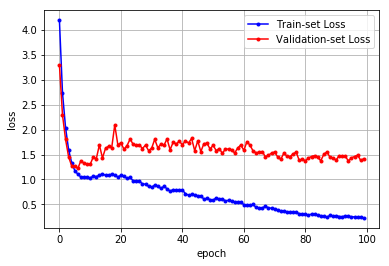

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 14s - loss: 4.1993 - acc: 0.4896 - val_loss: 3.2430 - val_acc: 0.5730
Epoch 2/100
 - 5s - loss: 2.7910 - acc: 0.5862 - val_loss: 2.3489 - val_acc: 0.5853
Epoch 3/100
 - 5s - loss: 2.0260 - acc: 0.6234 - val_loss: 1.7966 - val_acc: 0.6033
Epoch 4/100
 - 5s - loss: 1.5743 - acc: 0.6476 - val_loss: 1.4163 - val_acc: 0.6473
Epoch 5/100
 - 5s - loss: 1.3300 - acc: 0.6670 - val_loss: 1.4279 - val_acc: 0.5607
Epoch 6/100
 - 5s - loss: 1.1666 - acc: 0.6951 - val_loss: 1.2812 - val_acc: 0.6373
Epoch 7/100
 - 5s - loss: 1.0796 - acc: 0.7100 - val_loss: 1.1494 - val_acc: 0.6457
Epoch 8/100
 - 5s - loss: 1.0236 - acc: 0.7251 - val_loss: 1.1818 - val_acc: 0.6577
Epoch 9/100
 - 5s - loss: 1.0114 - acc: 0.7396 - val_loss: 1.1290 - val_acc: 0.6863
Epoch 10/100
 - 5s - loss: 1.0206 - acc: 0.7539 - val_loss: 1.2512 - val_acc: 0.6620
Epoch 11/100
 - 5s - loss: 1.0041 - acc: 0.7720 - val_loss: 1.7636 - val_acc: 0.5513
Epoch 12/100
 - 5s - loss

Epoch 97/100
 - 5s - loss: 0.2218 - acc: 0.9757 - val_loss: 1.4900 - val_acc: 0.6870
Epoch 98/100
 - 5s - loss: 0.2072 - acc: 0.9802 - val_loss: 1.4409 - val_acc: 0.6933
Epoch 99/100
 - 5s - loss: 0.2161 - acc: 0.9766 - val_loss: 1.3801 - val_acc: 0.7057
Epoch 100/100
 - 5s - loss: 0.2124 - acc: 0.9761 - val_loss: 1.4956 - val_acc: 0.6793
3000/3000 [==============================] - 1s 190us/step

Test Accuracy: 0.7597


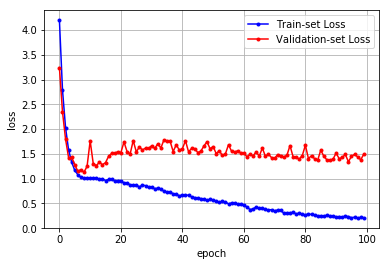

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 14s - loss: 4.2659 - acc: 0.4857 - val_loss: 3.2954 - val_acc: 0.5833
Epoch 2/100
 - 5s - loss: 2.8788 - acc: 0.5960 - val_loss: 2.3889 - val_acc: 0.6340
Epoch 3/100
 - 5s - loss: 2.1334 - acc: 0.6339 - val_loss: 1.9650 - val_acc: 0.5893
Epoch 4/100
 - 5s - loss: 1.6659 - acc: 0.6614 - val_loss: 1.6838 - val_acc: 0.6023
Epoch 5/100
 - 5s - loss: 1.3706 - acc: 0.6846 - val_loss: 1.5817 - val_acc: 0.5510
Epoch 6/100
 - 5s - loss: 1.2562 - acc: 0.6894 - val_loss: 1.2204 - val_acc: 0.6690
Epoch 7/100
 - 5s - loss: 1.1244 - acc: 0.7190 - val_loss: 1.3090 - val_acc: 0.6250
Epoch 8/100
 - 5s - loss: 1.0794 - acc: 0.7288 - val_loss: 5.5174 - val_acc: 0.3150
Epoch 9/100
 - 5s - loss: 1.0602 - acc: 0.7416 - val_loss: 1.2470 - val_acc: 0.6570
Epoch 10/100
 - 5s - loss: 1.0583 - acc: 0.7650 - val_loss: 1.2342 - val_acc: 0.6777
Epoch 11/100
 - 5s - loss: 1.0487 - acc: 0.7691 - val_loss: 1.2372 - val_acc: 0.6970
Epoch 12/100
 - 5s - loss

Epoch 97/100
 - 5s - loss: 0.2356 - acc: 0.9790 - val_loss: 1.4916 - val_acc: 0.7110
Epoch 98/100
 - 5s - loss: 0.2368 - acc: 0.9760 - val_loss: 1.5085 - val_acc: 0.7133
Epoch 99/100
 - 5s - loss: 0.2416 - acc: 0.9764 - val_loss: 1.5231 - val_acc: 0.7000
Epoch 100/100
 - 5s - loss: 0.2480 - acc: 0.9738 - val_loss: 1.5636 - val_acc: 0.6817
3000/3000 [==============================] - 1s 199us/step

Test Accuracy: 0.7560


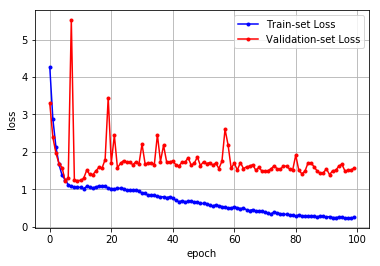

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 14s - loss: 4.2352 - acc: 0.5037 - val_loss: 3.8246 - val_acc: 0.5167
Epoch 2/100
 - 5s - loss: 2.8906 - acc: 0.5958 - val_loss: 2.5049 - val_acc: 0.5913
Epoch 3/100
 - 5s - loss: 2.1519 - acc: 0.6239 - val_loss: 2.0113 - val_acc: 0.5890
Epoch 4/100
 - 5s - loss: 1.6828 - acc: 0.6531 - val_loss: 1.5680 - val_acc: 0.6263
Epoch 5/100
 - 5s - loss: 1.3884 - acc: 0.6787 - val_loss: 1.3606 - val_acc: 0.6410
Epoch 6/100
 - 5s - loss: 1.2491 - acc: 0.6927 - val_loss: 1.3058 - val_acc: 0.6397
Epoch 7/100
 - 5s - loss: 1.1429 - acc: 0.7108 - val_loss: 1.2323 - val_acc: 0.6587
Epoch 8/100
 - 5s - loss: 1.0805 - acc: 0.7271 - val_loss: 1.2973 - val_acc: 0.6327
Epoch 9/100
 - 5s - loss: 1.0398 - acc: 0.7494 - val_loss: 1.2360 - val_acc: 0.6680
Epoch 10/100
 - 5s - loss: 1.0288 - acc: 0.7594 - val_loss: 1.4492 - val_acc: 0.6413
Epoch 11/100
 - 5s - loss: 1.0503 - acc: 0.7761 - val_loss: 1.3370 - val_acc: 0.6613
Epoch 12/100
 - 5s - loss

Epoch 97/100
 - 5s - loss: 0.2445 - acc: 0.9769 - val_loss: 1.5959 - val_acc: 0.6900
Epoch 98/100
 - 5s - loss: 0.2523 - acc: 0.9747 - val_loss: 1.6198 - val_acc: 0.6727
Epoch 99/100
 - 5s - loss: 0.2581 - acc: 0.9718 - val_loss: 1.4070 - val_acc: 0.7003
Epoch 100/100
 - 5s - loss: 0.2275 - acc: 0.9792 - val_loss: 1.4647 - val_acc: 0.6970
3000/3000 [==============================] - 1s 320us/step

Test Accuracy: 0.7767


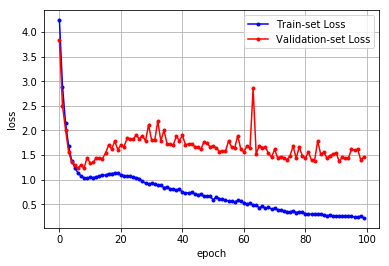

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 13s - loss: 4.2261 - acc: 0.4866 - val_loss: 3.3560 - val_acc: 0.5353
Epoch 2/100
 - 5s - loss: 2.8042 - acc: 0.5781 - val_loss: 2.3730 - val_acc: 0.5913
Epoch 3/100
 - 5s - loss: 2.0545 - acc: 0.6171 - val_loss: 1.9093 - val_acc: 0.5873
Epoch 4/100
 - 5s - loss: 1.5977 - acc: 0.6509 - val_loss: 1.4701 - val_acc: 0.6377
Epoch 5/100
 - 5s - loss: 1.3221 - acc: 0.6757 - val_loss: 1.3551 - val_acc: 0.6330
Epoch 6/100
 - 5s - loss: 1.1887 - acc: 0.6866 - val_loss: 1.1914 - val_acc: 0.6527
Epoch 7/100
 - 5s - loss: 1.0653 - acc: 0.7157 - val_loss: 1.1752 - val_acc: 0.6397
Epoch 8/100
 - 5s - loss: 1.0430 - acc: 0.7204 - val_loss: 1.1558 - val_acc: 0.6640
Epoch 9/100
 - 5s - loss: 1.0132 - acc: 0.7439 - val_loss: 1.2437 - val_acc: 0.6713
Epoch 10/100
 - 5s - loss: 1.0057 - acc: 0.7548 - val_loss: 1.1739 - val_acc: 0.6853
Epoch 11/100
 - 5s - loss: 1.0091 - acc: 0.7690 - val_loss: 1.1717 - val_acc: 0.6960
Epoch 12/100
 - 5s - loss

Epoch 97/100
 - 5s - loss: 0.2249 - acc: 0.9779 - val_loss: 1.4689 - val_acc: 0.6930
Epoch 98/100
 - 5s - loss: 0.2270 - acc: 0.9757 - val_loss: 1.3300 - val_acc: 0.7007
Epoch 99/100
 - 5s - loss: 0.2303 - acc: 0.9777 - val_loss: 2.5281 - val_acc: 0.5903
Epoch 100/100
 - 5s - loss: 0.2464 - acc: 0.9750 - val_loss: 1.3754 - val_acc: 0.7067
3000/3000 [==============================] - 1s 211us/step

Test Accuracy: 0.7703


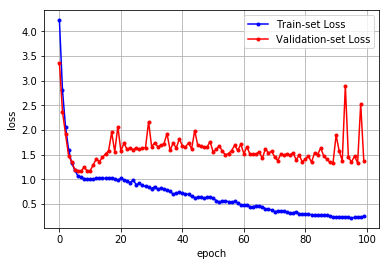

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 13s - loss: 4.2602 - acc: 0.4799 - val_loss: 3.4504 - val_acc: 0.5417
Epoch 2/100
 - 5s - loss: 2.8869 - acc: 0.5940 - val_loss: 2.3592 - val_acc: 0.6373
Epoch 3/100
 - 5s - loss: 2.1460 - acc: 0.6288 - val_loss: 1.9953 - val_acc: 0.5873
Epoch 4/100
 - 5s - loss: 1.6761 - acc: 0.6450 - val_loss: 1.5919 - val_acc: 0.6037
Epoch 5/100
 - 5s - loss: 1.3683 - acc: 0.6780 - val_loss: 1.4056 - val_acc: 0.6280
Epoch 6/100
 - 5s - loss: 1.1951 - acc: 0.6988 - val_loss: 1.2334 - val_acc: 0.6507
Epoch 7/100
 - 5s - loss: 1.1037 - acc: 0.7144 - val_loss: 1.2597 - val_acc: 0.6527
Epoch 8/100
 - 5s - loss: 1.0615 - acc: 0.7272 - val_loss: 2.1985 - val_acc: 0.4983
Epoch 9/100
 - 5s - loss: 1.0470 - acc: 0.7461 - val_loss: 1.2837 - val_acc: 0.6430
Epoch 10/100
 - 5s - loss: 1.0284 - acc: 0.7649 - val_loss: 1.3965 - val_acc: 0.6387
Epoch 11/100
 - 5s - loss: 1.0172 - acc: 0.7857 - val_loss: 1.2817 - val_acc: 0.6573
Epoch 12/100
 - 5s - loss

Epoch 97/100
 - 5s - loss: 0.2269 - acc: 0.9769 - val_loss: 1.4852 - val_acc: 0.7010
Epoch 98/100
 - 5s - loss: 0.2215 - acc: 0.9791 - val_loss: 1.4260 - val_acc: 0.6970
Epoch 99/100
 - 5s - loss: 0.2267 - acc: 0.9784 - val_loss: 1.5996 - val_acc: 0.6750
Epoch 100/100
 - 5s - loss: 0.2442 - acc: 0.9768 - val_loss: 1.5012 - val_acc: 0.6893
3000/3000 [==============================] - 1s 232us/step

Test Accuracy: 0.7727


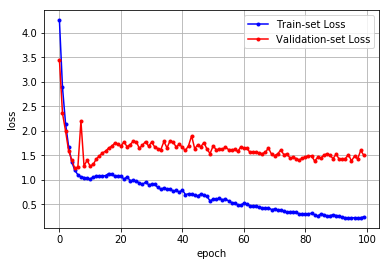

In [20]:
## ENSEMBLE MODELS
# Train many CNN models
for i in np.arange(no_estimators):
    # check point to save best model
    checkpoint = keras.callbacks.ModelCheckpoint('models_3/model_'+str(i)+'.h5', monitor='val_acc', \
            verbose=0, save_best_only=True, save_weights_only=True, mode='auto')
    # clear GPU memory
    model = None
    K.clear_session()
    
    # train model
    model = create_cnn_model()
    history=model.fit(X_train, Y_train, validation_data=(X_validation, Y_validation), nb_epoch=100, \
                batch_size=64, verbose=2, callbacks=[checkpoint])
    print("\nTest Accuracy: {:.4f}".format(model.evaluate(X_test, Y_test)[1]))
    y_vloss=history.history['val_loss']
    y_loss=history.history['loss']
    
    x_len=numpy.arange(len(y_loss))
    plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
    plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
    
    plt.legend(loc='upper right')
    plt.grid()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

In [21]:
# Check individual scores - val_acc and get list of the best models
score_list = []
score_list2 = []
score_list3=[]
model = create_cnn_model()
for i in np.arange(no_estimators):    
    model.load_weights('models_3/model_'+str(i)+'.h5')
    scores3= model.evaluate(X_test, Y_test, verbose=0)
    scores2= model.evaluate(X_train, Y_train, verbose=0)
    scores = model.evaluate(X_validation, Y_validation, verbose=0)
    score_list.append(scores[1])   #validation Acc
    score_list2.append(scores2[1])    #Train Acc
    score_list3.append(scores3[1])  #Test Acc
score_list = np.array(score_list)
score_list2= np.array(score_list2)
score_list3= np.array(score_list3)
score_list_filter = score_list >= 0.72 # threshold to select best model
print("Train Acc: "+str(score_list2))
print("Validation Acc: "+ str(score_list))
print("Test Acc: "+ str(score_list3))

print(score_list_filter)

C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  after removing the cwd from sys.path.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  import sys
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_l

Train Acc: [0.99722222 0.999      0.99755556 0.999      0.999      0.99822222
 0.99977778 0.99888889 0.99711111 0.999     ]
Validation Acc: [0.71666667 0.714      0.72733333 0.714      0.71933333 0.71366667
 0.71633333 0.708      0.726      0.711     ]
Test Acc: [0.783      0.77133333 0.80133333 0.812      0.78066667 0.795
 0.78766667 0.788      0.79333333 0.80033333]
[False False  True False False False False False  True False]


In [22]:
# Ensemble predictions ~ val_err 16%
predictions = np.zeros((Y_validation.shape[0],Y_validation.shape[1]))
predictions_test=np.zeros((Y_test.shape[0],Y_test.shape[1]))
model = create_cnn_model()
for i in np.arange(no_estimators): 
    if score_list_filter[i] == False:
        continue
    #validation
    model.load_weights('models_3/model_'+str(i)+'.h5')
    prediction = model.predict_classes(X_validation, batch_size=200, verbose=0)
    prediction_onehot = np_utils.to_categorical(prediction, 10)
    predictions = predictions + prediction_onehot*score_list[i]
    #Test
    prediction_test = model.predict_classes(X_test, batch_size=200, verbose=0)
    prediction_onehot_test = np_utils.to_categorical(prediction_test, 10)
    predictions_test = predictions_test + prediction_onehot_test*score_list3[i]

predictions_label = np.argmax(predictions, axis=1)
evaluate = np.equal(predictions_label, Y_validation_label)

predictions_label_test = np.argmax(predictions_test, axis=1)
evaluate_test = np.equal(predictions_label_test, Y_test_label)

print("Ensemble Validation_Error: %.2f%%" % (100-np.mean(evaluate)*100))
print("Ensemble Validation_Accuracy: %.2f%%" % (np.mean(evaluate)*100))

print("Ensemble Test_Error: %.2f%%" % (100-np.mean(evaluate_test)*100))
print("Ensemble Test_Accuracy: %.2f%%" % (np.mean(evaluate_test)*100))

C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  after removing the cwd from sys.path.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  import sys
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_l

Ensemble Validation_Error: 27.27%
Ensemble Validation_Accuracy: 72.73%
Ensemble Test_Error: 19.87%
Ensemble Test_Accuracy: 80.13%


In [21]:
## PERFORM PREDICTION ON TEST SET

X_test = X_test_label.astype('float32')

predictions = np.zeros((Y_validation.shape[0],Y_validation.shape[1]))
model = create_cnn_model()
for i in np.arange(no_estimators): 
    if score_list_filter[i] == False: # skip bad model
        continue
    model.load_weights('models_3/model_'+str(i)+'.h5')
    prediction = model.predict_classes(X_test, batch_size=200, verbose=0)
    prediction_onehot = np_utils.to_categorical(prediction, 10)
    predictions = predictions + prediction_onehot*score_list[i]

predictions_label = np.argmax(predictions, axis=1)
output = predictions_label.tolist()

with open('testlabel.pickle','wb') as f:
    pickle.dump(output, f)

pred = model.evaluate(X_test, Y_test)
print("test loss: ",pred[0]+"test acc: ",pred[1])

C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  after removing the cwd from sys.path.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  import sys
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_l

3000/3000 [==============================] - 1s 337us/step


TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('<U32') dtype('<U32') dtype('<U32')